# 数据合并

在实际的业务中，需要将多个文档、数据，可能是 Series 或 DataFrame 拼合在一起，进行大数据分析。Pandas 提供的各种功能轻而易举地进行这些工作。

数据的合并其实有合并、连接、拼接等几种，最简单的是连接。连接字段相同只是把新的内容追加在后边。合并可能是不同的列，把这些列组合在一起形成多个列。还有一种是混合的，在以上的基础上，合并过程中还需要做些计算。

## pd.concat()  数据连接

Pandas 数据的连接可以实现纵向和横向连接，将数据连接后会形成一个新的对象， Series 或 DataFrame。

pd.concat() 是专门用于数据连接合并的函数，它可以沿着行或者列进行操作，同时可以指定非合并轴的合并方式（合集、交集等）。

In [8]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                   index=[0, 1, 2, 3])

df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                    'B': ['B4', 'B5', 'B6', 'B7'],
                    'C': ['C4', 'C5', 'C6', 'C7'],
                    'D': ['D4', 'D5', 'D6', 'D7']},
                   index=[4, 5, 6, 7])

df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                    'B': ['B8', 'B9', 'B10', 'B11'],
                    'C': ['C8', 'C9', 'C10', 'C11'],
                    'D': ['D8', 'D9', 'D10', 'D11']},
                   index=[8, 9, 10, 11])

df4 = pd.DataFrame({'B': ['B2', 'B3', 'B6', 'B7'],
                    'D': ['D2', 'D3', 'D6', 'D7'],
                    'F': ['F2', 'F3', 'F6', 'F7']},
                   index=[2, 3, 6, 7])

### 自然索引

In [6]:
# 将三个有相同列的表合并到一起，并使用新的自然索引：
frames=[df1,df2,df3]
df=pd.concat(frames)
df

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


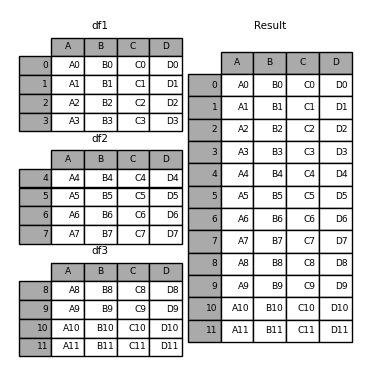

### 指定索引

In [7]:
# 可以再给每个表给一个一级索引，形成多层索引
frames=[df1,df2,df3]
df=pd.concat(frames,keys=['x','y','z'])
df

A    B    C    D
x 0    A0   B0   C0   D0
  1    A1   B1   C1   D1
  2    A2   B2   C2   D2
  3    A3   B3   C3   D3
y 4    A4   B4   C4   D4
  5    A5   B5   C5   D5
  6    A6   B6   C6   D6
  7    A7   B7   C7   D7
z 8    A8   B8   C8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C10  D10
  11  A11  B11  C11  D11

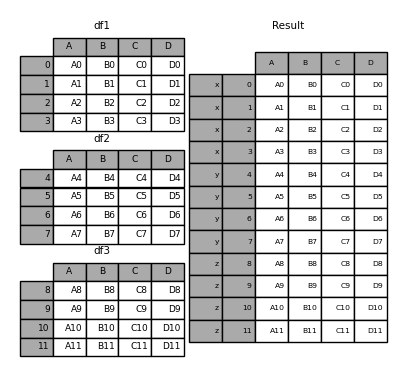

### 忽略索引

In [11]:
df=pd.concat([df1,df4],ignore_index=True,sort=False)
df

,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
4,NaN,B2,NaN,D2,F2
5,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


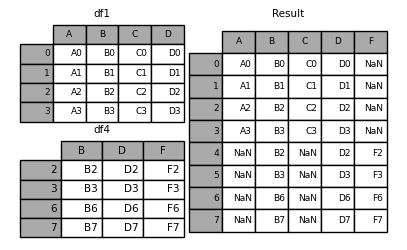

### 按列连接

In [12]:
# 按列进行连接，没有的值为空
df=pd.concat([df1,df4],axis=1,sort=False)
df

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


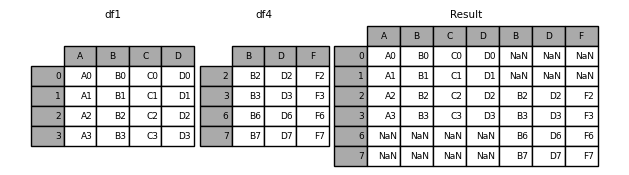

### 取交集

以上连接后得到了两个表内容的并集（默认是 join ='outer'），如果我们需要交集呢？

可见只将以有共同索引的内容进行了合并。

In [13]:
df=pd.concat([df1,df4],axis=1,join='inner')
df

,A,B,C,D,B,D,F
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


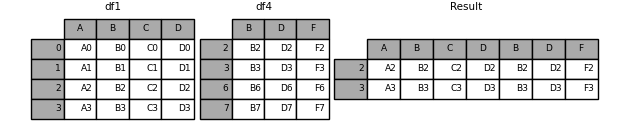

### 只取指定索引内容

如果我们只需要第一张表索引的内容，可以

以下两个方法效果一样

In [14]:
pd.concat([df1,df4],axis=1).reindex(df1.index)

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


In [15]:
pd.concat([df1,df4.reindex(df1.index)],axis=1)

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


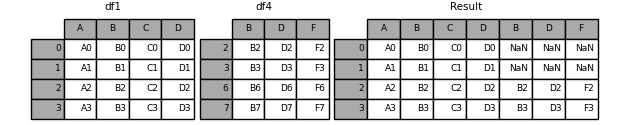

### 与序列合并

不用维度的数据也可以合并

In [16]:
s1 = pd.Series(['X0', 'X1', 'X2', 'X3'], name='X')

df 和 s 合并

In [17]:
pd.concat([df1,s1],axis=1)

,A,B,C,D,X
0,A0,B0,C0,D0,X0
1,A1,B1,C1,D1,X1
2,A2,B2,C2,D2,X2
3,A3,B3,C3,D3,X3


但是，还是建议使用 df.assign() 来定义一个新列

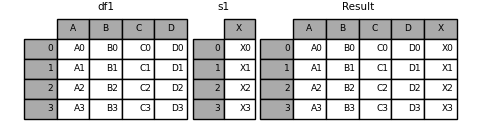

如果序列没名称，会自动给写 012 之类的自然索引名称：

In [19]:
s2 = pd.Series(['_0', '_1', '_2', '_3'])
pd.concat([df1, s2, s2, s2], axis=1)

,A,B,C,D,0,1,2
0,A0,B0,C0,D0,_0,_0,_0
1,A1,B1,C1,D1,_1,_1,_1
2,A2,B2,C2,D2,_2,_2,_2
3,A3,B3,C3,D3,_3,_3,_3


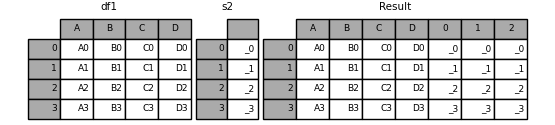

ignore_index=True 会取消原有列名

In [20]:
pd.concat([df1, s1], axis=1, ignore_index=True)

,0,1,2,3,4
0,A0,B0,C0,D0,X0
1,A1,B1,C1,D1,X1
2,A2,B2,C2,D2,X2
3,A3,B3,C3,D3,X3


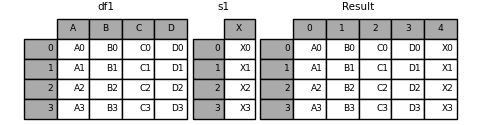

### 指定新索引名

In [23]:
s3 = pd.Series([0, 1, 2, 3], name='foo')
s4 = pd.Series([0, 1, 2, 3])
s5 = pd.Series([0, 1, 4, 5])
print(s3,s4,s5)

0    0
1    1
2    2
3    3
Name: foo, dtype: int64 0    0
1    1
2    2
3    3
dtype: int64 0    0
1    1
2    4
3    5
dtype: int64


In [22]:
pd.concat([s3,s4,s5],axis=1)

,foo,0,1
0,0,0,0
1,1,1,1
2,2,2,4
3,3,3,5


给定 keys 会采用新的列名:

In [24]:
pd.concat([s3, s4, s5], axis=1, keys=['red', 'blue', 'yellow'])

,red,blue,yellow
0,0,0,0
1,1,1,1
2,2,2,4
3,3,3,5


如果是 df 连接行，则指定为索引名：

In [25]:
pd.concat(frames, keys=['x', 'y', 'z'])

A    B    C    D
x 0    A0   B0   C0   D0
  1    A1   B1   C1   D1
  2    A2   B2   C2   D2
  3    A3   B3   C3   D3
y 4    A4   B4   C4   D4
  5    A5   B5   C5   D5
  6    A6   B6   C6   D6
  7    A7   B7   C7   D7
z 8    A8   B8   C8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C10  D10
  11  A11  B11  C11  D11

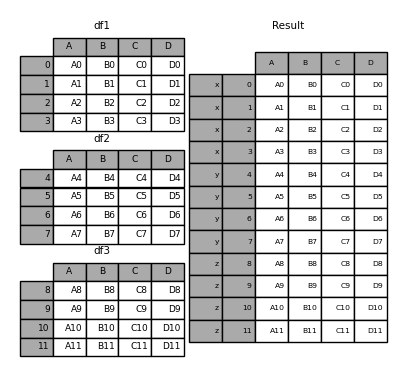

也可以用字典形式，定义各自表的索引名称：

In [29]:
pieces = {'x': df1, 'y': df2, 'z': df3}
pd.concat(pieces)

A    B    C    D
x 0    A0   B0   C0   D0
  1    A1   B1   C1   D1
  2    A2   B2   C2   D2
  3    A3   B3   C3   D3
y 4    A4   B4   C4   D4
  5    A5   B5   C5   D5
  6    A6   B6   C6   D6
  7    A7   B7   C7   D7
z 8    A8   B8   C8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C10  D10
  11  A11  B11  C11  D11

只取字典中的部分：

In [28]:
pd.concat(pieces, keys=['z', 'y'])

A    B    C    D
z 8    A8   B8   C8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C10  D10
  11  A11  B11  C11  D11
y 4    A4   B4   C4   D4
  5    A5   B5   C5   D5
  6    A6   B6   C6   D6
  7    A7   B7   C7   D7

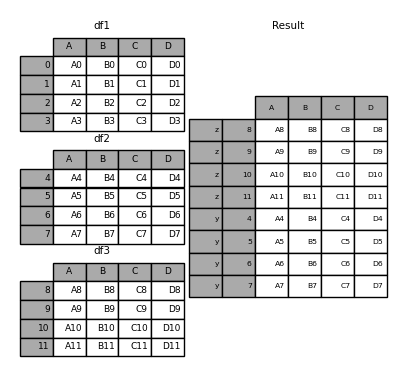

In [31]:
 pd.concat(pieces, keys=['x', 'y', 'z'],
               levels=[['z', 'y', 'x', 'w']],
               names=['group_key'])

A    B    C    D
group_key                       
x         0    A0   B0   C0   D0
          1    A1   B1   C1   D1
          2    A2   B2   C2   D2
          3    A3   B3   C3   D3
y         4    A4   B4   C4   D4
          5    A5   B5   C5   D5
          6    A6   B6   C6   D6
          7    A7   B7   C7   D7
z         8    A8   B8   C8   D8
          9    A9   B9   C9   D9
          10  A10  B10  C10  D10
          11  A11  B11  C11  D11

In [32]:
_.index.levels

FrozenList([['z', 'y', 'x', 'w'], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]])

## 多文件数据合并

### 多文件合并

最简单的方法是先单个把数据取出现来，然后进行合并

In [ ]:
df1 = pd.DataFrame(data1)
df2 = pd.read_excel('tmp.xlsx')
df3 = pd.read_csv('tmp.csv')

merged_df = pd.concat([df1, df2, df3])

不要一个一个地去用 concat，这样性能会很差，可以先把所有表格加到列表里，一次性合并

In [ ]:
frames = [ process_your_file(f) for f in files ]
result = pd.concat(frames)

一个包含多个 Sheet 的 Excel 合并成一个 DataFrame

In [ ]:
dfm = pd.read_excel('team.xlsx', sheet_name=None)
pd.concat(dfm.values())
pd.concat(dfm) # 保留 Sheet 名作为一级索引

### 读取目录文件

如果文件存在一个目录下，推荐方法

In [ ]:
import glob
# 取出目录下所有 xlsx 格式文件
files = glob.glob("data/*.xlsx")
cols = ['记录ID', '开始时间', '名称'] # 只取这些列
# 列表推导出对象
dflist = [pd.read_excel(i, usecols=cols) for i in files]
df = pd.concat(dflist) # 合并

其他方法：

In [ ]:
# 多个文件
pd.concat(map(pd.read_csv, ['data/d1.csv',
                            'data/d2.csv',
                            'data/d3.csv']))

pd.concat(map(pd.read_excel, ['data/d1.xlsx',
                              'data/d2.xlsx',
                              'data/d3.xlsx']))

# 目录下所有文件
from os import listdir
filepaths = [f for f in listdir("./data") if f.endswith('.csv')]
df = pd.concat(map(pd.read_csv, filepaths))

# 方法 2
import glob
df = pd.concat(map(pd.read_csv, glob.glob('data/*.csv')))
df = pd.concat(map(pd.read_excel, glob.glob('data/*.xlsx')))

### 追加列合并

如果需要使用pd.merge()追加列合并时，由于此方法只能合并两个 DataFrame，因此可以用 reduce 来操作完成

In [ ]:
from functools import reduce

df = reduce(lambda a, b: pd.merge(a, b, on=['记录ID']), dflist)

## df.append 数据追加 

df.append 可以将其他行附加到调用方的末尾，并返回一个新对象。它是最简单常用的数据合并方式。

### 语法结构

```
df.append(self, other, ignore_index=False,
          verify_integrity=False, sort=False)
其中：

other 是它要追加的其他 DataFrame 或者类似序列内容
ignore_index 如果为 True 则重新进行自然索引
verify_integrity 如果为 True 则遇到重复索引内容时报错
sort 进行排序
```

### 同结构

In [34]:
df1.append(df2)

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


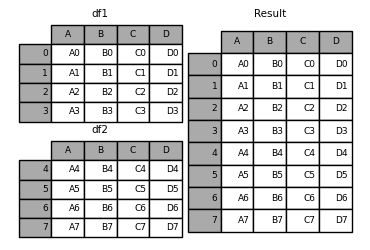

### 不同结构

In [35]:
df1.append(df4, sort=False)

,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
2,NaN,B2,NaN,D2,F2
3,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


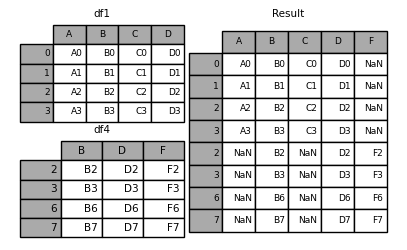

### 追加多个

In [37]:
df1.append([df2, df3])

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


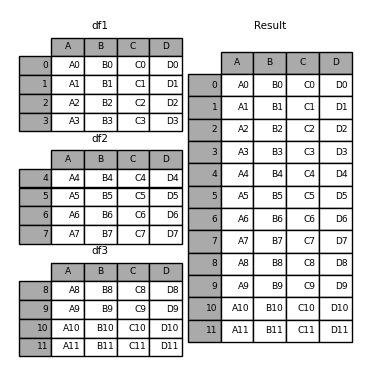

### 忽略索引

在合并不保留原索引，启用新的自然索引

In [39]:
df1.append(df4, ignore_index=True, sort=False)

,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
4,NaN,B2,NaN,D2,F2
5,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


### 追加Series

In [40]:
s2 = pd.Series(['X0', 'X1', 'X2', 'X3'],
               index=['A', 'B', 'C', 'D'])
df1.append(s2, ignore_index=True)

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,X0,X1,X2,X3


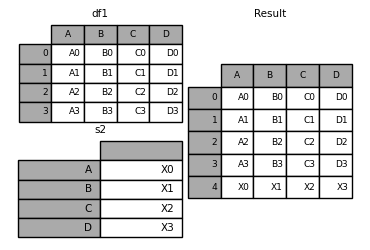

### 追截字典列表

In [41]:
dicts = [{'A': 1, 'B': 2, 'C': 3, 'X': 4},
         {'A': 5, 'B': 6, 'C': 7, 'Y': 8}]
df1.append(dicts, ignore_index=True, sort=False)

,A,B,C,D,X,Y
0,A0,B0,C0,D0,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN
2,A2,B2,C2,D2,NaN,NaN
3,A3,B3,C3,D3,NaN,NaN
4,1,2,3,NaN,4.0,NaN
5,5,6,7,NaN,NaN,8.0


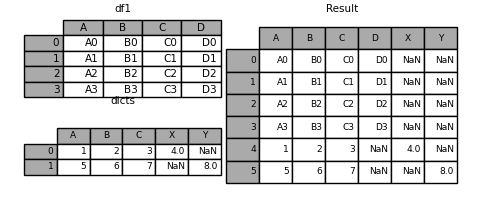

## pd.merge 

### 语法结构

```PYTHON
可以将两个 DataFrame 或者 Series 进行连接：

pd.merge(left, right, how='inner', on=None, left_on=None, right_on=None,
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)
可以实现类似 SQL 的 join 操作，参数为：

how：连接方式，默认为inner，可设为inner/outer/left/right
on：根据某个字段进行连接，必须存在于两个DateFrame中（若未同时存在，则需要分别使用left_on 和 right_on 来设置）
left_on：左连接，以DataFrame1中用作连接键的列
right_on：右连接，以DataFrame2中用作连接键的列
left_index：bool, default False，将DataFrame1行索引用作连接键
right_index：bool, default False，将DataFrame2行索引用作连接键
sort：根据连接键对合并后的数据进行排列，默认为True
suffixes：对两个数据集中出现的重复列，新数据集中加上后缀 _x, _y 进行区别
```

In [139]:
left = pd.DataFrame({'key': ['K3', 'K2', 'K1', 'K0'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})
left

,key,A,B
0,K3,A0,B0
1,K2,A1,B1
2,K1,A2,B2
3,K0,A3,B3


In [140]:
right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K4'],
                      'C': ['C0', 'C1', 'C2', 'C3'],
                      'D': ['D0', 'D1', 'D2', 'D3']})
right

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K4,C3,D3


### on

如果需要拼接的两个表中，有相同的列信息，那么进行拼接的时候即使不指定以哪个字段作为主键函数也会默认用信息相同的列做主键对两个表进行拼接

In [141]:
pd.merge(left,right)

,key,A,B,C,D
0,K2,A1,B1,C2,D2
1,K1,A2,B2,C1,D1
2,K0,A3,B3,C0,D0


In [142]:
# on：这个参数确定哪些字段作为主键
pd.merge(left,right,on='key')

,key,A,B,C,D
0,K2,A1,B1,C2,D2
1,K1,A2,B2,C1,D1
2,K0,A3,B3,C0,D0


可以指定多个主键

In [136]:
left = pd.DataFrame({ 
   'id':[1,2,3,4], 
   'Name': ['Smith', 'Maiki', 'Hunter', 'Hilen'], 
   'subject_id':['sub1','sub2','sub4','sub6']}) 
left

,id,Name,subject_id
0,1,Smith,sub1
1,2,Maiki,sub2
2,3,Hunter,sub4
3,4,Hilen,sub6


In [137]:
right = pd.DataFrame({ 
    'id':[1,2,3,4], 
   'Name': ['Bill', 'Lucy', 'Jack', 'Mike'], 
   'subject_id':['sub2','sub4','sub3','sub6']}) 
right

,id,Name,subject_id
0,1,Bill,sub2
1,2,Lucy,sub4
2,3,Jack,sub3
3,4,Mike,sub6


In [138]:
pd.merge(left,right,on=['id','subject_id'])

,id,Name_x,subject_id,Name_y
0,4,Hilen,sub6,Mike


### sort

In [143]:
pd.merge(left,right,on='key')

,key,A,B,C,D
0,K2,A1,B1,C2,D2
1,K1,A2,B2,C1,D1
2,K0,A3,B3,C0,D0


In [144]:
pd.merge(left,right,on='key',sort=True)

,key,A,B,C,D
0,K0,A3,B3,C0,D0
1,K1,A2,B2,C1,D1
2,K2,A1,B1,C2,D2


### how

how 参数控制拼接方式，与 sql 表连接效果类似，默认内连接（inner）,即求交集

可设为
```
inner(交集)
outer(并集)
left(以左主键为准)
right(以右主键为准)
```

In [100]:
pd.merge(left,right,on='key',how='inner')#内连接

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2


In [101]:
pd.merge(left,right,on='key',how='left')#左连接

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,NaN,NaN


In [102]:
pd.merge(left,right,on='key',how='right')#右连接

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K4,NaN,NaN,C3,D3


In [106]:
pd.merge(left,right,on='key',how='outer')#外连接

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,NaN,NaN
4,K4,NaN,NaN,C3,D3


### leftindex和rightindex

合并dataframe，除了指定主键外，还和根据行索引合并

leftindex 和 rightindex 默认为 False，不以行索引为主键

In [105]:
pd.merge(left,right,left_index=True,right_index=True)

,key_x,A,B,key_y,C,D
0,K0,A0,B0,K0,C0,D0
1,K1,A1,B1,K1,C1,D1
2,K2,A2,B2,K2,C2,D2
3,K3,A3,B3,K4,C3,D3


### lefton和righton

如果列名不同，但列确实是同一列，即同列不同命名

可以通过 lefton righton 指定

In [115]:
lefton = pd.DataFrame({'key1': ['K0', 'K1', 'K2', 'K3'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})
lefton

,key1,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [116]:
righton = pd.DataFrame({'key2': ['K0', 'K1', 'K2', 'K4'],
                      'C': ['C0', 'C1', 'C2', 'C3'],
                      'D': ['D0', 'D1', 'D2', 'D3']})
righton

,key2,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K4,C3,D3


In [118]:
pd.merge(lefton,righton,left_on='key1',right_on='key2')

,key1,A,B,key2,C,D
0,K0,A0,B0,K0,C0,D0
1,K1,A1,B1,K1,C1,D1
2,K2,A2,B2,K2,C2,D2


### suffixes

这个参数用于更改 合并后的 _x _y 

suffixes=（left,right）

In [126]:
leftsuffixes = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})
leftsuffixes

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [127]:
rightsuffixes = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K4'],
                      'A': ['C0', 'C1', 'C2', 'C3'],
                      'D': ['D0', 'D1', 'D2', 'D3']})
rightsuffixes

,key,A,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K4,C3,D3


In [129]:
pd.merge(leftsuffixes,rightsuffixes,on='key')

,key,A_x,B,A_y,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2


In [131]:
pd.merge(leftsuffixes,rightsuffixes,on='key', suffixes=('_left','_right'))

,key,A_left,B,A_right,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2


### indicator

显示合并的数据来自那个表

In [133]:
pd.merge(leftsuffixes,rightsuffixes,on='key',how='right',indicator=True)

,key,A_x,B,A_y,D,_merge
0,K0,A0,B0,C0,D0,both
1,K1,A1,B1,C1,D1,both
2,K2,A2,B2,C2,D2,both
3,K4,NaN,NaN,C3,D3,right_only


### validate

```
If specified, checks if merge is of specified type.

“one_to_one” or “1:1”: check if merge keys are unique in both left and right datasets.
对于左右主键都是唯一

“one_to_many” or “1:m”: check if merge keys are unique in left dataset.
左唯一右不唯一

“many_to_one” or “m:1”: check if merge keys are unique in right dataset.
左不唯一右唯一

“many_to_many” or “m:m”: allowed, but does not result in checks.
左右都不唯一

```

In [ ]:
# 不会

### join 多个 dataframe

df.join(df2) 可以连用对多个数据完成合并拼接

In [56]:
df.join(df2) # 按索引连接
left.join([right, right2]) # 连接多个表
# 支持的参数 lsuffix/rsuffix 为左右表后缀
df1.join(other, on=None, how='left', lsuffix='', rsuffix='', sort=False)

ValueError: cannot join with no overlapping index names

### 其他操作

In [ ]:
# df 也有 merge 方法，用法与 pd.merge 相同
left.merge(right, how='inner')
# 按索引连接
pd.merge(left, right, left_index=True, right_index=True, how='inner')
# 列和索引连接
left.join(right, on=key_or_keys)
result = left.join(right, on=['key1', 'key2'])
pd.merge(left, right, left_on=key_or_keys, right_index=True,
      how='left', sort=False)

# 连接方式
result = left.join(right, how='inner')
# 取消索引按列连接
pd.merge(left.reset_index(), right.reset_index(),
         on=['key'], how='inner').set_index(['key', 'Y'])

## 时序数据合并

### pd.merge_ordered

pd.merge_ordered 函数允许组合时间序列和其他有序数据。 特别是，它具有可选的fill_method 关键字来填充/插入丢失的数据

In [63]:
left = pd.DataFrame({'k': ['K0', 'K1', 'K1', 'K2'],
                     'lv': [1, 2, 3, 4],
                     's': ['a', 'b', 'c', 'd']})

right = pd.DataFrame({'k': ['K1', 'K2', 'K4'],
                      'rv': [1, 2, 3]})

left

,k,lv,s
0,K0,1,a
1,K1,2,b
2,K1,3,c
3,K2,4,d


In [64]:
right

,k,rv
0,K1,1
1,K2,2
2,K4,3


In [65]:
pd.merge_ordered(left, right, fill_method='ffill', left_by='s')

,k,lv,s,rv
0,K0,1.0,a,NaN
1,K1,1.0,a,1.0
2,K2,1.0,a,2.0
3,K4,1.0,a,3.0
4,K1,2.0,b,1.0
5,K2,2.0,b,2.0
6,K4,2.0,b,3.0
7,K1,3.0,c,1.0
8,K2,3.0,c,2.0
9,K4,3.0,c,3.0


按照 s 列的顺序进行了排序，它也适用于时间类型的数据

### pd.merge_asof

## 逐元素合并

在数据合并过程中需要对应位置的数值进行计算，比如相加、平均，对空值补齐等，Pandas 提供了 df.combine_first() 和 df. combine() 等方法进行这些操作。

### df.combine_first()

使用相同位置的值更新空元素，它只能是 df1 有空元素时才能被替换，如果数据结构不一致，所得 DataFram e的行索引和列索引将是两者的并集。

In [66]:
df1 = pd.DataFrame({'A': [None, 0], 'B': [None, 4]})
df2 = pd.DataFrame({'A': [1, 1], 'B': [3, 3]})
df1

,A,B
0,NaN,NaN
1,0.0,4.0


In [67]:
df2

,A,B
0,1,3
1,1,3


In [68]:
df1.combine_first(df2)

,A,B
0,1.0,3.0
1,0.0,4.0


在上例中，df1 中的 A 和 B 的空值被 df2 中的相同位置值替换。

In [69]:
df1 = pd.DataFrame({'A': [None, 0], 'B': [4, None]})
df2 = pd.DataFrame({'B': [3, 3], 'C': [1, 1]}, index=[1, 2])
df1

,A,B
0,NaN,4.0
1,0.0,NaN


In [70]:
df2

,B,C
1,3,1
2,3,1


In [71]:
df1.combine_first(df2)

,A,B,C
0,NaN,4.0,NaN
1,0.0,3.0,1.0
2,NaN,3.0,1.0


在上例中，df1 中的 A 中的空值由于没有相同位置值来替换，仍然为空

### df.combine()

### df.update()

## 数据对比

### 语法

### 用法

### 其他方法

### 数据相同 

### 数据对齐